In [1]:
# R version 4.1.0 #
# Load packages: Seurat_4.1.1, RColorBrewer_1.1-3, ggplot2_3.3.6, extrafont_0.18,stringr_1.4.0 
packages = c('Seurat','RColorBrewer','ggplot2','extrafont','stringr','EnvStats')

for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}


In [2]:
seurat <- readRDS('source_data/generated/v3_proteomics_ds_seurat_PCA_UMAP_clusters_ds38_min10_v4.rds') ## saved in proteomics_seurat_v3.R
seurat$cell.type <- factor(seurat$cell.type)


Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2 3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


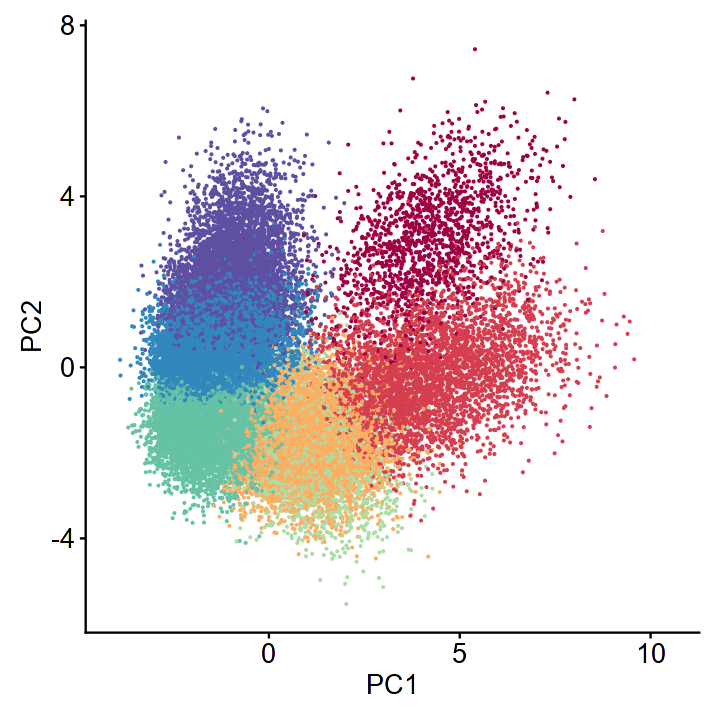

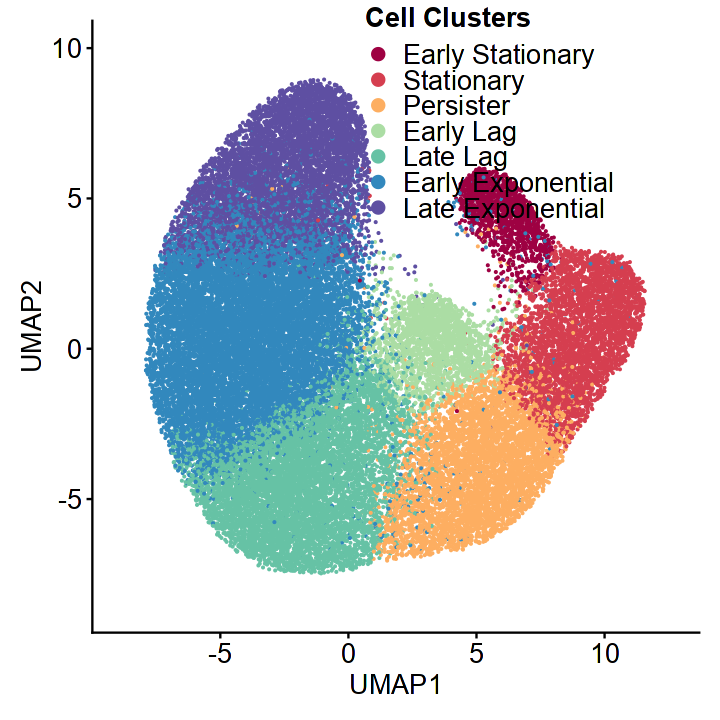

In [3]:
seurat@active.ident <- seurat$seurat_clusters
options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
n_cells_per = 2000
alpha = 1
pt.size = 0.1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

ids = levels(seurat$seurat_clusters)

sub_seurat=subset(seurat,idents=ids)
sampled.cells <- c()
set.seed(111)
sampled.cells <- sample(x = names(subset(seurat,protein=='FALSE')$cell.type), size=40000, replace=F)

DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,reduction='pca',shuffle=TRUE) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(name='Cell Clusters',labels = c("Early Stationary", "Stationary","Persister","Early Lag","Late Lag","Early Exponential","Late Exponential"), values = alpha(my_cols[c(1,2,4,7,8,9,10)],alpha))+ xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.position='none')
ggsave('figures/figED7a_clusters.pdf',width = 5, height = 5)


xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1

DimPlot(subset(sub_seurat,cells=sampled.cells),pt.size=pt.size,shuffle=TRUE) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(name='Cell Clusters',labels = c("Early Stationary", "Stationary","Persister","Early Lag","Late Lag","Early Exponential","Late Exponential"), values = alpha(my_cols[c(1,2,4,7,8,9,10)],alpha))+ xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),axis.text=element_text(size=16),legend.text=element_text(size=16),legend.position=c(0.45,0.85),legend.title = element_text(face = "bold"))
ggsave('figures/figED7b_clusters.pdf',width = 5, height = 5)


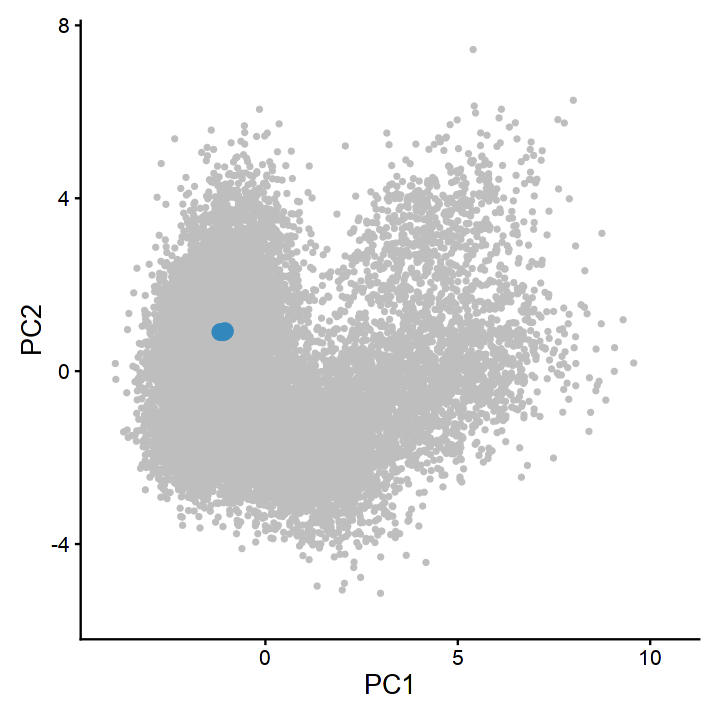

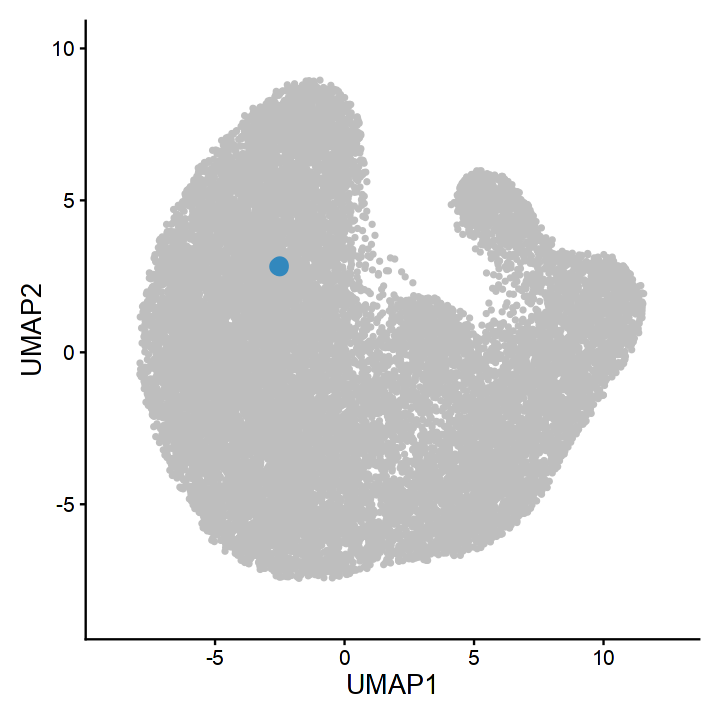

In [4]:
sampled.cells <- sample(x = names(subset(seurat,protein=='FALSE')$cell.type), size=20000, replace=F)

id = 'LFQ.intensity.35_exp'
seurat@active.ident = factor(seurat$protein)
levels(seurat@active.ident) <- c(levels(seurat@active.ident),levels(seurat$seurat_clusters))
seurat@active.ident[seurat@active.ident=='TRUE'] = seurat$seurat_clusters[seurat$cell.type==id]
seurat@active.ident <- droplevels(seurat@active.ident)

options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
alpha = 1
pt.size = 1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

set.seed(111)
sampled.cells.2 <- c(sampled.cells,names(subset(seurat,cell.type==id)$cell.type))

alpha = c(0.5,1)
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='pca',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Exponential"),values = alpha(c('gray',my_cols[c(9)]),alpha)) + xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7a_exp.pdf',width = 5, height = 5)

xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='umap',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Early Exponential"),values = alpha(c('gray',my_cols[c(9)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7b_exp.pdf',width = 5, height = 5)


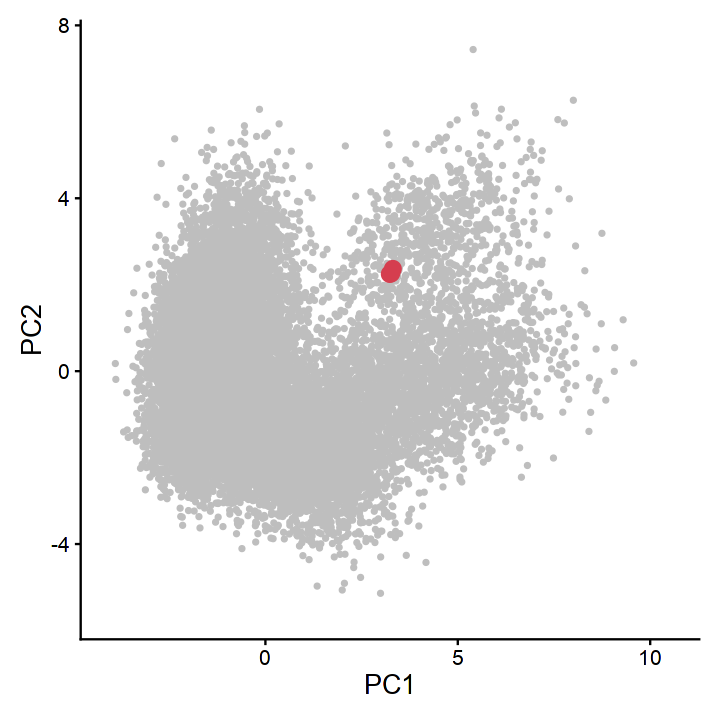

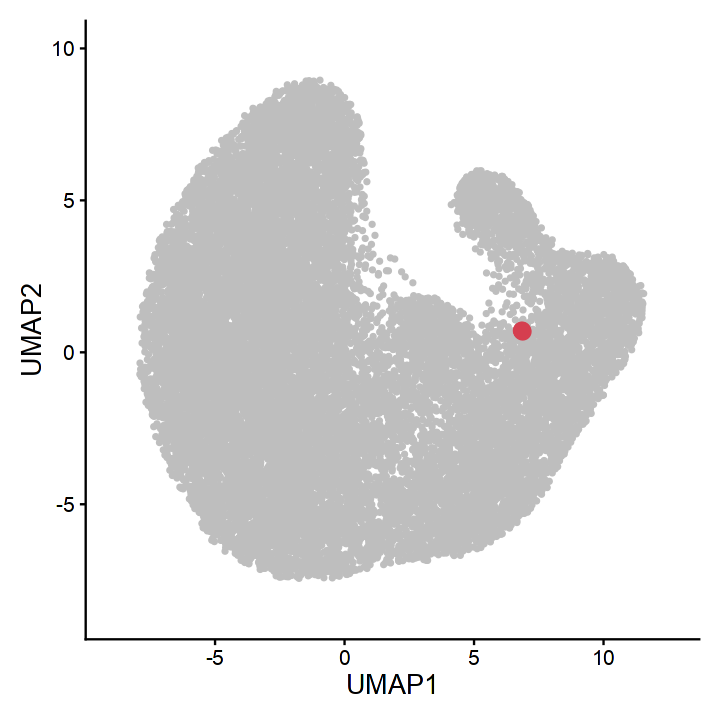

In [5]:
id = 'LFQ.intensity.35_O_N'
seurat@active.ident = factor(seurat$protein)
levels(seurat@active.ident) <- c(levels(seurat@active.ident),levels(seurat$seurat_clusters))
seurat@active.ident[seurat@active.ident=='TRUE'] = seurat$seurat_clusters[seurat$cell.type==id]
seurat@active.ident <- droplevels(seurat@active.ident)

options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
alpha = 1
pt.size = 1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

set.seed(111)
sampled.cells.2 <- c(sampled.cells,names(subset(seurat,cell.type==id)$cell.type))

alpha = c(1,1)
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='pca',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7a_35_on.pdf',width = 5, height = 5)

xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='umap',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7b_35_on.pdf',width = 5, height = 5)


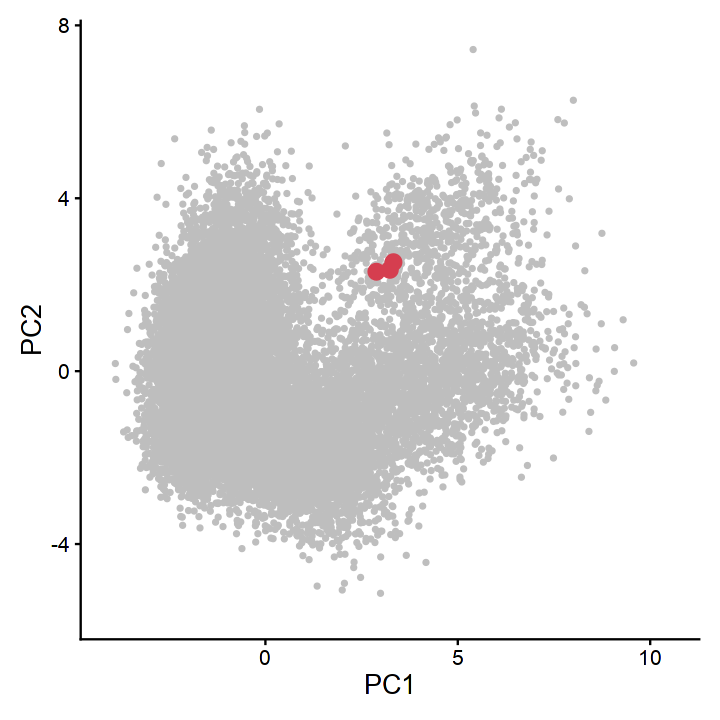

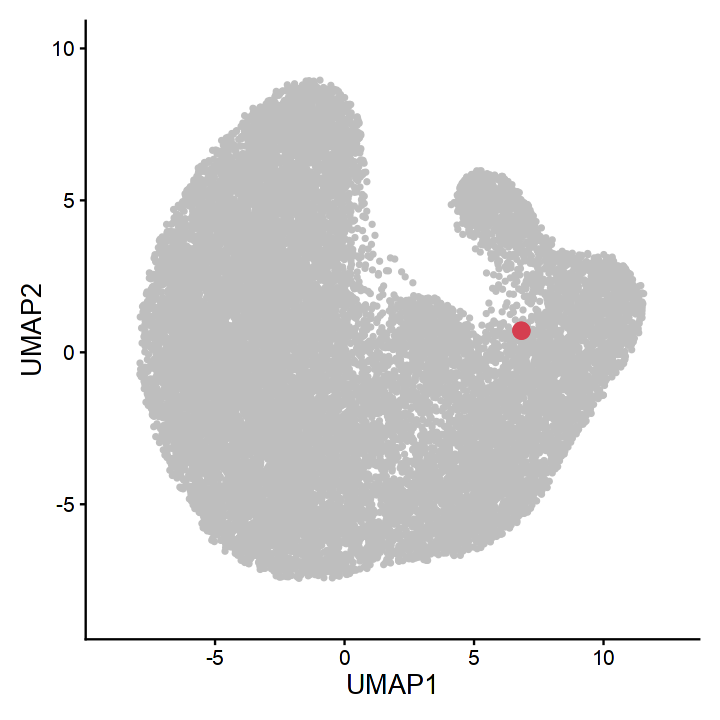

In [6]:
id = 'LFQ.intensity.40_O_N'
seurat@active.ident = factor(seurat$protein)
levels(seurat@active.ident) <- c(levels(seurat@active.ident),levels(seurat$seurat_clusters))
seurat@active.ident[seurat@active.ident=='TRUE'] = seurat$seurat_clusters[seurat$cell.type==id]
seurat@active.ident <- droplevels(seurat@active.ident)

options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
alpha = 1
pt.size = 1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

set.seed(111)
sampled.cells.2 <- c(sampled.cells,names(subset(seurat,cell.type==id)$cell.type))

alpha = c(1,1)
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='pca',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7a_40_on.pdf',width = 5, height = 5)

xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='umap',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7b_40_on.pdf',width = 5, height = 5)


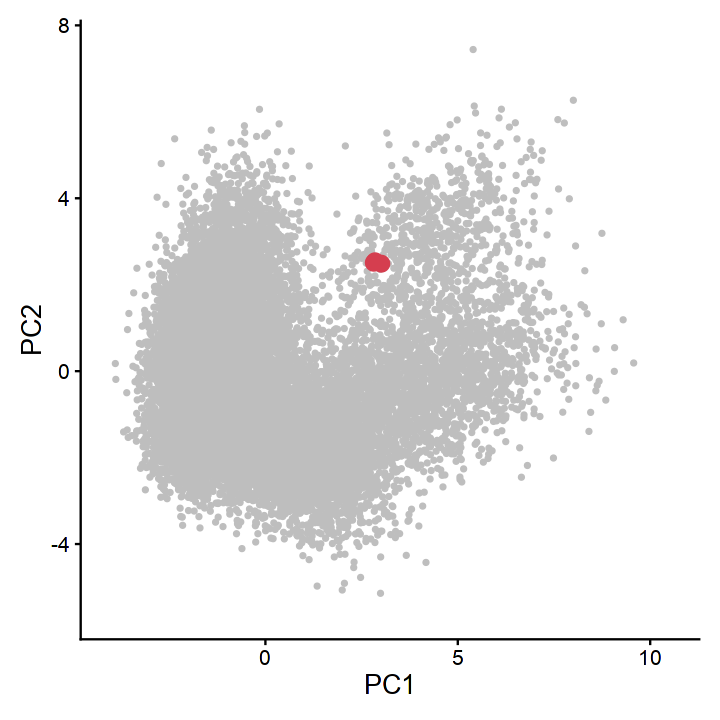

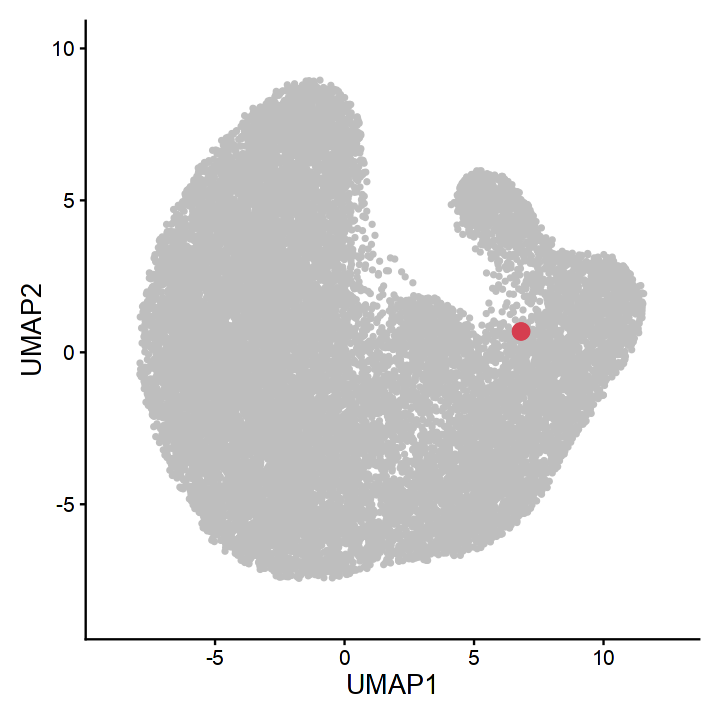

In [7]:
id = 'LFQ.intensity.40_lag'
seurat@active.ident = factor(seurat$protein)
levels(seurat@active.ident) <- c(levels(seurat@active.ident),levels(seurat$seurat_clusters))
seurat@active.ident[seurat@active.ident=='TRUE'] = seurat$seurat_clusters[seurat$cell.type==id]
seurat@active.ident <- droplevels(seurat@active.ident)

options(repr.plot.width=6, repr.plot.height=6)
my_cols = brewer.pal(10,"Spectral")
alpha = 1
pt.size = 1
xmin = min(seurat$pca@cell.embeddings[,'PC_1'])
xmax = max(seurat$pca@cell.embeddings[,'PC_1'])
ymin = min(seurat$pca@cell.embeddings[,'PC_2'])
ymax = max(seurat$pca@cell.embeddings[,'PC_2'])

set.seed(111)
sampled.cells.2 <- c(sampled.cells,names(subset(seurat,cell.type==id)$cell.type))

alpha = c(1,1)
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='pca',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('PC1') + ylab('PC2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7a_40_lag.pdf',width = 5, height = 5)

xmin = min(seurat$umap@cell.embeddings[,'UMAP_1'])-1
xmax = max(seurat$umap@cell.embeddings[,'UMAP_1'])+1
ymin = min(seurat$umap@cell.embeddings[,'UMAP_2'])-1
ymax = max(seurat$umap@cell.embeddings[,'UMAP_2'])+1
DimPlot(subset(seurat,cells=sampled.cells.2),reduction='umap',pt.size=c(rep(1,20000),rep(4,3)),order=rev(c('FALSE','1','5'))) +
    xlim(xmin,xmax) + ylim(ymin,ymax) +
    scale_color_manual(labels = c('',"Stationary"),values = alpha(c('gray',my_cols[c(2)]),alpha)) + xlab('UMAP1') + ylab('UMAP2') +
    theme(text=element_text(family= "Arial", size=16),legend.position='none',legend.title = element_text(face = "bold"))
ggsave('figures/figED7b_40_lag.pdf',width = 5, height = 5)
